# Sanjeet Kumar
#20PGMCA16


---



In [1]:
import pandas as pd

#Read the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/fake_or_real_news.csv')
#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

df = df.dropna()
df.head(110)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
105,4933,Where is Gary Johnson?,(CNN) Conservatives dissatisfied with Donald T...,REAL
106,5530,The Arcturian Group by Marilyn Raffaele Octobe...,,FAKE
107,7680,Nuclear weapons question,Report Copyright Violation nuclear weapons que...,FAKE
108,10490,Kevin MacDonald celebrates Trump’s Amazing Vic...,“WE ARE THE FUTURE.” — Kevin MacDonald \nThis ...,FAKE


In [3]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [4]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

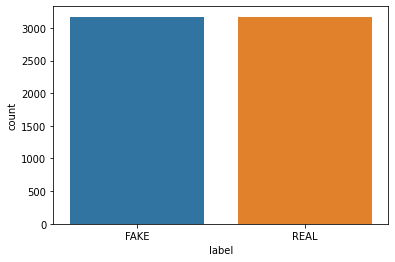

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize=(10,6))
sns.countplot(x = 'label',data=df)

In [6]:
text = " ".join(review for review in df.text)
#print ("There are {} words in the combination of all review.".format(len(text)))

# Ploting WordCloud

---



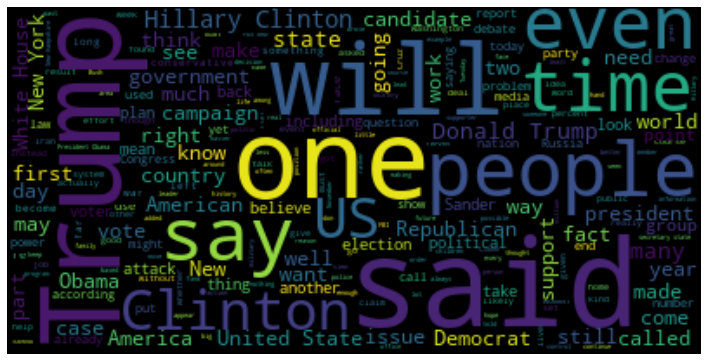

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(max_words=1000, stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

(-0.5, 799.5, 532.5, -0.5)

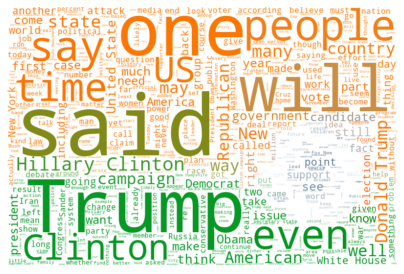

In [8]:
from PIL import Image
import numpy as np

mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/DIP/tric.jpg"))
wordcloud_por = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [9]:
# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")

In [10]:
empty_index = [index for index,text in enumerate(df.text.tolist()) if str(text).strip()==""]
df.iloc[empty_index]

,Unnamed: 0,title,text,label
106,5530,The Arcturian Group by Marilyn Raffaele Octobe...,,FAKE
710,8332,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,FAKE
806,9314,Southern Poverty Law Center Targets Anti-Jihad...,,FAKE
919,10304,Refugee Resettlement Watch: Swept Away In Nort...,,FAKE
940,9474,Michael Bloomberg Names Technological Unemploy...,,FAKE
1664,5802,Alert News : Putins Army Is Coming For World W...,,FAKE
1736,9564,An LDS Reader Takes A Look At Trump Accuser Je...,,FAKE
1851,5752,America’s Senator Jeff Sessions Warns of Worse...,,FAKE
1883,8816,Paris Migrant Campers Increase after Calais Is...,,FAKE
1941,7525,Putins Army is coming for World war 3 against ...,,FAKE


In [11]:
df['text'] = df['title'] + " " + df['text']

In [12]:
df =  df[['text', 'label']]

In [13]:
df.append(df, ignore_index=True)

,text,label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy U....,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matte...,REAL
...,...,...
12665,State Department says it can't find emails fro...,REAL
12666,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
12667,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE
12668,"In Ethiopia, Obama seeks progress on peace, se...",REAL


In [14]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [15]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import  pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
import numpy as np

In [16]:
import nltk
import re #Regular Expression
from nltk.corpus import  stopwords
from gensim.models import Word2Vec
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
Y = df['label'].values

In [18]:
X = [d.split() for d in df['text'].tolist()]
len(X)

6335

#Data Preprocessing

---



In [19]:
from nltk.stem import WordNetLemmatizer

lemitizer = WordNetLemmatizer()
corpus = []

print(len(X))
for i in range(0, len(X)):
  words = re.sub('[^a-zA-Z]', ' ',str(X[i]))
  words = words.lower()
  words = words.split()
  words = [lemitizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
  words = ' '.join(words)
  corpus.append(words)

6335


In [20]:
corpus[0]

'smell hillary fear daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word unprecedented thrown around often election ought retired still unprecedented nominee major political party go war fbi exactly hillary people done coma patient waking watching hour cnn hospital bed would assume fbi director james comey hillary opponent election fbi attack everyone obama cnn hillary people circulated letter attacking comey currently medium hit piece lambasting targeting trump surprising clinton ally start running attack ad fbi fbi leadership warned entire left wing establishment form lynch mob continue going hillary fbi credibility attacked medium democrat preemptively head result investigation clinton foundation hillary clinton covert struggle fbi agent obama doj people gone explosively public new york time compared comey j edgar hoover bizarre headline james comey role recall hoover fbi fa

##Word To Vector

---



In [24]:
#word Diminsion of vector
DIM = 100
word_vec = Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [25]:
len(word_vec.wv.vocab)

219529

In [26]:
word_vec['Trump']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-4.8291063e+00,  8.4321916e-01,  2.5848606e+00,  1.1300063e+00,
       -2.2262480e+00,  6.7234712e+00, -2.2556855e-01, -3.0398915e+00,
        1.6869256e+00, -2.9068599e+00,  8.5778177e-01,  6.5541101e-01,
        4.7189867e-01, -9.3178439e-01,  1.4531784e+00,  2.2958264e+00,
       -4.5455825e-01,  2.0229583e+00, -5.2584262e+00,  3.1783750e+00,
        8.8781700e-02, -3.3610780e+00, -5.3702660e+00,  6.0375314e+00,
       -6.0300183e-01,  2.0320885e+00, -2.1588519e+00, -3.7609782e+00,
        3.2697098e+00,  2.3909512e+00, -1.3662726e+00,  5.6015873e+00,
        1.6812544e+00,  6.2447476e+00, -2.0182035e+00,  3.3395014e+00,
        8.5949647e-01, -2.3577051e+00,  9.5539463e-01,  1.1442604e+00,
       -1.5191932e+00, -1.1899236e+00, -5.3125730e+00,  3.0199873e+00,
        1.2604963e+00,  4.0457497e+00, -1.2734942e+00, -3.7097290e+00,
        6.1086607e+00,  1.0309658e+00,  8.2879597e-01,  1.0248883e+01,
       -1.6759361e+00,  1.5918906e+00,  2.6239130e+00, -8.5552506e-02,
      

In [27]:
word_vec.wv.most_similar('India')

[('Pakistan', 0.9095520377159119),
 ('Germany', 0.9080253839492798),
 ('Poland', 0.9026679992675781),
 ('Chinese', 0.8797401189804077),
 ('Norway', 0.877254843711853),
 ('Russia’s', 0.8766722679138184),
 ('Mediterranean', 0.8691303133964539),
 ('Ukraine,', 0.8669294118881226),
 ('Pacific', 0.8651696443557739),
 ('Persian', 0.862329363822937)]

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [29]:
X = tokenizer.texts_to_sequences(X)

In [30]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'in': 6,
 'that': 7,
 'is': 8,
 'for': 9,
 'on': 10,
 'as': 11,
 'with': 12,
 'he': 13,
 'was': 14,
 'it': 15,
 'are': 16,
 'by': 17,
 'be': 18,
 'have': 19,
 'this': 20,
 'his': 21,
 'has': 22,
 'not': 23,
 'at': 24,
 'from': 25,
 'but': 26,
 'an': 27,
 'they': 28,
 'who': 29,
 'trump': 30,
 'will': 31,
 'i': 32,
 'we': 33,
 'about': 34,
 'or': 35,
 'their': 36,
 'said': 37,
 'you': 38,
 'would': 39,
 'clinton': 40,
 'more': 41,
 'been': 42,
 'her': 43,
 'if': 44,
 'what': 45,
 'one': 46,
 'she': 47,
 'were': 48,
 'all': 49,
 'had': 50,
 'which': 51,
 'people': 52,
 'new': 53,
 'when': 54,
 '—': 55,
 'than': 56,
 'out': 57,
 'can': 58,
 'our': 59,
 'also': 60,
 'so': 61,
 'up': 62,
 'no': 63,
 'there': 64,
 'after': 65,
 'just': 66,
 'other': 67,
 'some': 68,
 'its': 69,
 'over': 70,
 'into': 71,
 'like': 72,
 'state': 73,
 'could': 74,
 'do': 75,
 'hillary': 76,
 'president': 77,
 'us': 78,
 'even': 79,
 'how': 80,
 'only': 81,
 'ob

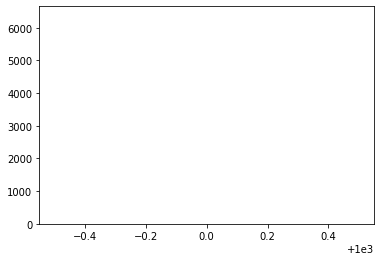

In [44]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [35]:
num = np.array([len(x) for x in X])
len(num[num>1000])

0

In [36]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [37]:
len(X[101])

1000

In [38]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [39]:
def getWeightMetrix(model):
  weight_metrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_metrix[i] = model.wv[word]

  return weight_metrix

In [43]:
#embedded_docs = pad_sequences(word_vec, padding='pre')
embedding_vectors = getWeightMetrix(word_vec)

KeyError: ignored

In [ ]:
embedding_vectors.shape

#One Hot Repersentation

---



In [ ]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]
#onehot_repr

In [ ]:
sent_length = 30
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen= sent_length)
embedded_docs

In [ ]:
len(embedded_docs)

In [ ]:
#Creating Model
embedding_vector_features = 40 #Dimenssion
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy']) #adam = Adem optemizer, mse = mean squared error
model.summary()

In [ ]:
len(embedded_docs), Y.shape

In [ ]:
X_final = np.array(embedded_docs)
y_final = np.array(Y)

In [ ]:
X_final.shape,y_final.shape

In [ ]:
## Divide the dataset into Train and Test\n",
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

#Model Traning

---



In [ ]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X,Y),epochs=6,batch_size=64)

#Adding Dropout

---



In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Performance Metrics And Accuracy

---



In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
from sklearn.metrics import  confusion_matrix

confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)